In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [32]:
import pandas as pd

df = pd.read_csv("weather2.csv")
print(df.head())




                            date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13  

In [35]:
print(df.columns)


Index(['date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


In [37]:
['date', 'Temp', 'Humidity', 'Rainfall']



['date', 'Temp', 'Humidity', 'Rainfall']

In [38]:
# remove any spaces and make consistent
df.columns = df.columns.str.strip()

# print again to verify
print(df.columns)

# find the actual name of your date column, for example:
# if you saw 'date' or 'Date ' — use that exact one below
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# verify
df.info()
df.head()


Index(['date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover      

C:\Users\lenovo.com\AppData\Local\Temp\ipykernel_12564\698568232.py:9: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


,date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [41]:
# Show first few rows
df.head()

# Summary of data types and missing values
df.info()

# Quick statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [43]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if conversion worked
print(df.info())

# Now safely extract month and year
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype                    
---  ------                    --------------  -----                    
 0   date                      56469 non-null  datetime64[ns, UTC+02:00]
 1   Summary                   96453 non-null  object                   
 2   Precip Type               95936 non-null  object                   
 3   Temperature (C)           96453 non-null  float64                  
 4   Apparent Temperature (C)  96453 non-null  float64                  
 5   Humidity                  96453 non-null  float64                  
 6   Wind Speed (km/h)         96453 non-null  float64                  
 7   Wind Bearing (degrees)    96453 non-null  int64                    
 8   Visibility (km)           96453 non-null  float64                  
 9   Loud Cover                96453 non-null  int64                    
 10  Pressure (

,date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month,Year
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,4.0,2006.0
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,4.0,2006.0
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,4.0,2006.0
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,4.0,2006.0
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,4.0,2006.0


In [45]:
df.head()

,date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month,Year
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,4.0,2006.0
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,4.0,2006.0
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,4.0,2006.0
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,4.0,2006.0
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,4.0,2006.0


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype                    
---  ------                    --------------  -----                    
 0   date                      56469 non-null  datetime64[ns, UTC+02:00]
 1   Summary                   96453 non-null  object                   
 2   Precip Type               95936 non-null  object                   
 3   Temperature (C)           96453 non-null  float64                  
 4   Apparent Temperature (C)  96453 non-null  float64                  
 5   Humidity                  96453 non-null  float64                  
 6   Wind Speed (km/h)         96453 non-null  float64                  
 7   Wind Bearing (degrees)    96453 non-null  int64                    
 8   Visibility (km)           96453 non-null  float64                  
 9   Loud Cover                96453 non-null  int64                    
 10  Pressure (

In [47]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Month,Year
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,56469.000000,56469.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,6.877437,2010.987515
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,2.024889,3.165446
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000,2006.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,5.000000,2008.000000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,7.000000,2011.000000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,9.000000,2014.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,10.000000,2016.000000


In [48]:
df.isnull().sum()

date                        39984
Summary                         0
Precip Type                   517
Temperature (C)                 0
Apparent Temperature (C)        0
Humidity                        0
Wind Speed (km/h)               0
Wind Bearing (degrees)          0
Visibility (km)                 0
Loud Cover                      0
Pressure (millibars)            0
Daily Summary                   0
Month                       39984
Year                        39984
dtype: int64

In [50]:
print(df.columns)


Index(['date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Month', 'Year'],
      dtype='object')


In [53]:
df.columns = df.columns.str.strip()

In [54]:
df['Weather'].unique()

KeyError: 'Weather'

In [55]:
for col in df.columns:
    print(repr(col))


'date'
'Summary'
'Precip Type'
'Temperature (C)'
'Apparent Temperature (C)'
'Humidity'
'Wind Speed (km/h)'
'Wind Bearing (degrees)'
'Visibility (km)'
'Loud Cover'
'Pressure (millibars)'
'Daily Summary'
'Month'
'Year'


In [56]:

df.columns = df.columns.str.strip()


In [60]:
print(df.columns[df.columns.str.contains("Weather", case=False, regex=True)])


Index([], dtype='object')


In [63]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Month'] = df['Date/Time'].dt.month
df['Year'] = df['Date/Time'].dt.year
df['Day'] = df['Date/Time'].dt.day


KeyError: 'Date/Time'

In [64]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Month'] = df['Date/Time'].dt.month
df['Year'] = df['Date/Time'].dt.year
df['Day'] = df['Date/Time'].dt.day

df.head()


KeyError: 'Date/Time'

In [65]:
for col in df.columns:
    print(repr(col))


'date'
'Summary'
'Precip Type'
'Temperature (C)'
'Apparent Temperature (C)'
'Humidity'
'Wind Speed (km/h)'
'Wind Bearing (degrees)'
'Visibility (km)'
'Loud Cover'
'Pressure (millibars)'
'Daily Summary'
'Month'
'Year'


In [66]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract parts of the date
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['Day'] = df['date'].dt.day

# Check the updated data
df.head()


,date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month,Year,Day
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,4.0,2006.0,1.0
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,4.0,2006.0,1.0
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,4.0,2006.0,1.0
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,4.0,2006.0,1.0
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,4.0,2006.0,1.0


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if conversion worked
print(df['date'].head())


0   2006-04-01 00:00:00+02:00
1   2006-04-01 01:00:00+02:00
2   2006-04-01 02:00:00+02:00
3   2006-04-01 03:00:00+02:00
4   2006-04-01 04:00:00+02:00
Name: date, dtype: datetime64[ns, UTC+02:00]


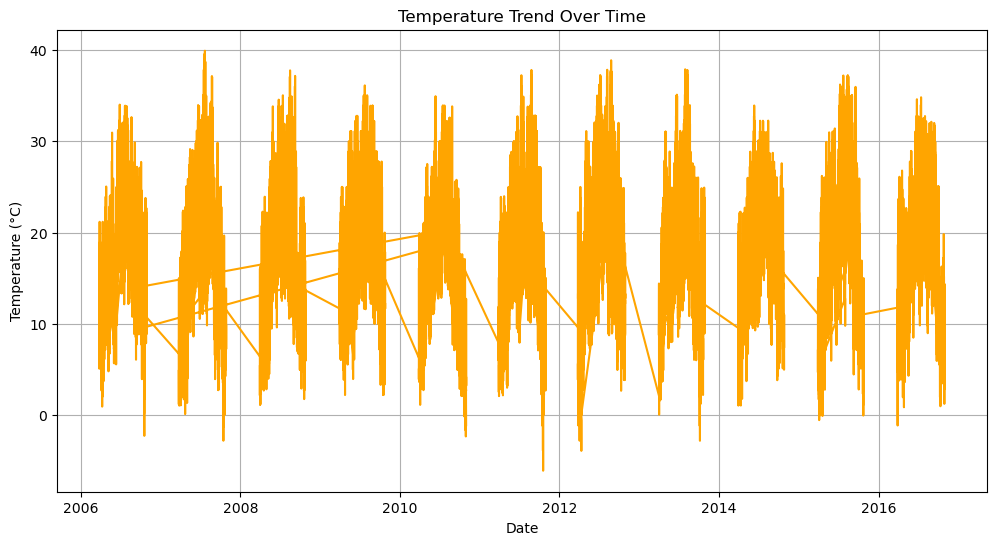

In [71]:
# Remove timezone info (make it timezone-naive)
df['date'] = df['date'].dt.tz_localize(None)

# Plot temperature trend
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Temperature (C)'], color='orange')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


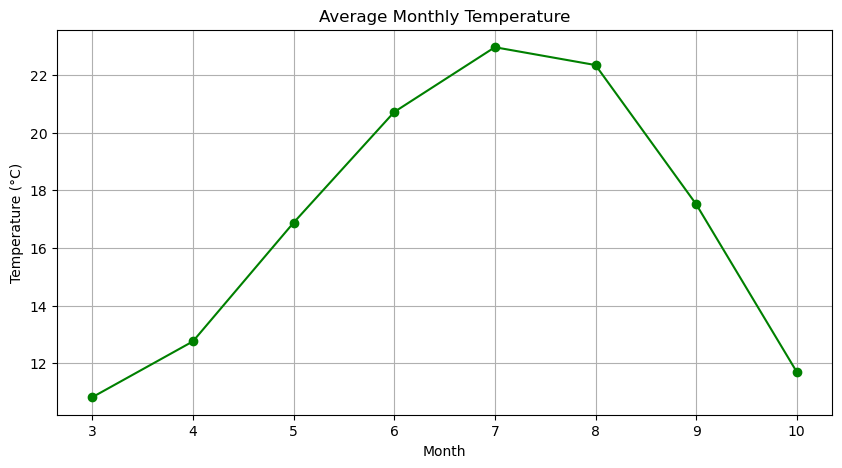

In [74]:
df['Month'] = df['date'].dt.month
monthly_avg = df.groupby('Month')['Temperature (C)'].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='green')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [75]:
df['Month'] = df['date'].dt.month



In [76]:
monthly_avg = df.groupby('Month')['Temperature (C)'].mean()
print(monthly_avg)


Month
3.0     10.819368
4.0     12.756417
5.0     16.873692
6.0     20.715617
7.0     22.963943
8.0     22.345031
9.0     17.516790
10.0    11.695224
Name: Temperature (C), dtype: float64


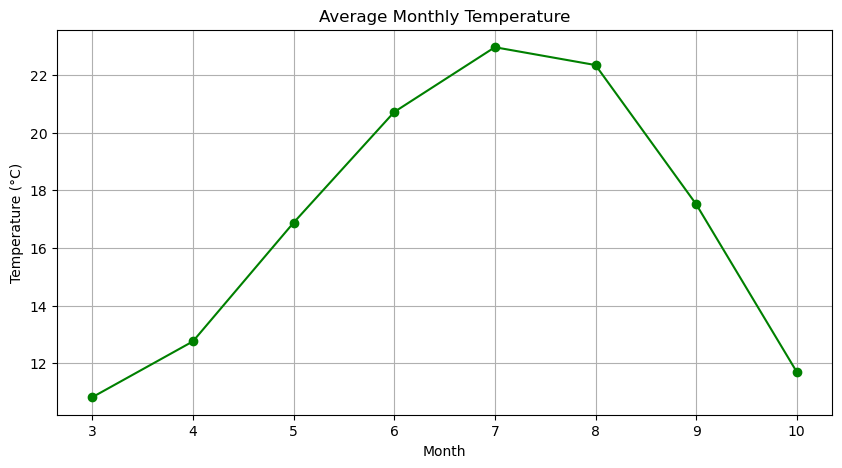

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='green')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()
